In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'C:/Users/wind8166/Documents/GitHub/2nd-ML100Days/data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = pd.DataFrame(app_train, columns = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL','AMT_CREDIT'])
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT
0,100002,Cash loans,M,202500.0,406597.5
1,100003,Cash loans,F,270000.0,1293502.5
2,100004,Revolving loans,M,67500.0,135000.0
3,100006,Cash loans,F,135000.0,312682.5
4,100007,Cash loans,M,121500.0,513000.0


In [6]:
df['AMT_INCOME_TOTAL'].sum()

51907216960.935005

In [7]:
df['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [8]:
df['AMT_INCOME_TOTAL'].cumsum()

0         2.025000e+05
1         4.725000e+05
2         5.400000e+05
3         6.750000e+05
4         7.965000e+05
5         8.955000e+05
6         1.066500e+06
7         1.426500e+06
8         1.539000e+06
9         1.674000e+06
10        1.786500e+06
11        1.824919e+06
12        1.892419e+06
13        2.117419e+06
14        2.306419e+06
15        2.463919e+06
16        2.571919e+06
17        2.652919e+06
18        2.765419e+06
19        2.855419e+06
20        2.990419e+06
21        3.192919e+06
22        3.642919e+06
23        3.726169e+06
24        3.861169e+06
25        3.951169e+06
26        4.063669e+06
27        4.176169e+06
28        4.446169e+06
29        4.536169e+06
              ...     
307481    5.190161e+10
307482    5.190183e+10
307483    5.190193e+10
307484    5.190247e+10
307485    5.190274e+10
307486    5.190303e+10
307487    5.190315e+10
307488    5.190331e+10
307489    5.190353e+10
307490    5.190361e+10
307491    5.190370e+10
307492    5.190429e+10
307493    5

In [9]:
df.corr()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT
SK_ID_CURR,1.000000,-0.00182,-0.000343
AMT_INCOME_TOTAL,-0.001820,1.00000,0.156870
AMT_CREDIT,-0.000343,0.15687,1.000000


In [10]:
df.cov()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT
SK_ID_CURR,1.056582e+10,-4.436777e+07,-1.419730e+07
AMT_INCOME_TOTAL,-4.436777e+07,5.622739e+10,1.497168e+10
AMT_CREDIT,-1.419730e+07,1.497168e+10,1.619988e+11


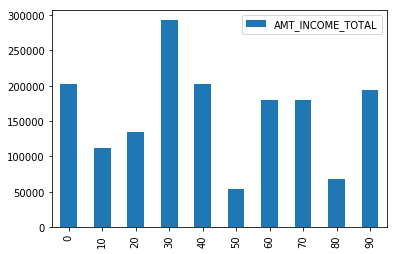

In [11]:
df = pd.DataFrame(app_train, columns=[  'AMT_INCOME_TOTAL'], index=np.arange(0, 100, 10))
df.plot(kind='bar')